<a href="https://colab.research.google.com/github/sergiolopezzl/DIMD/blob/main/Tarea_CNN_SergioLeoAriasCamilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flower Classification

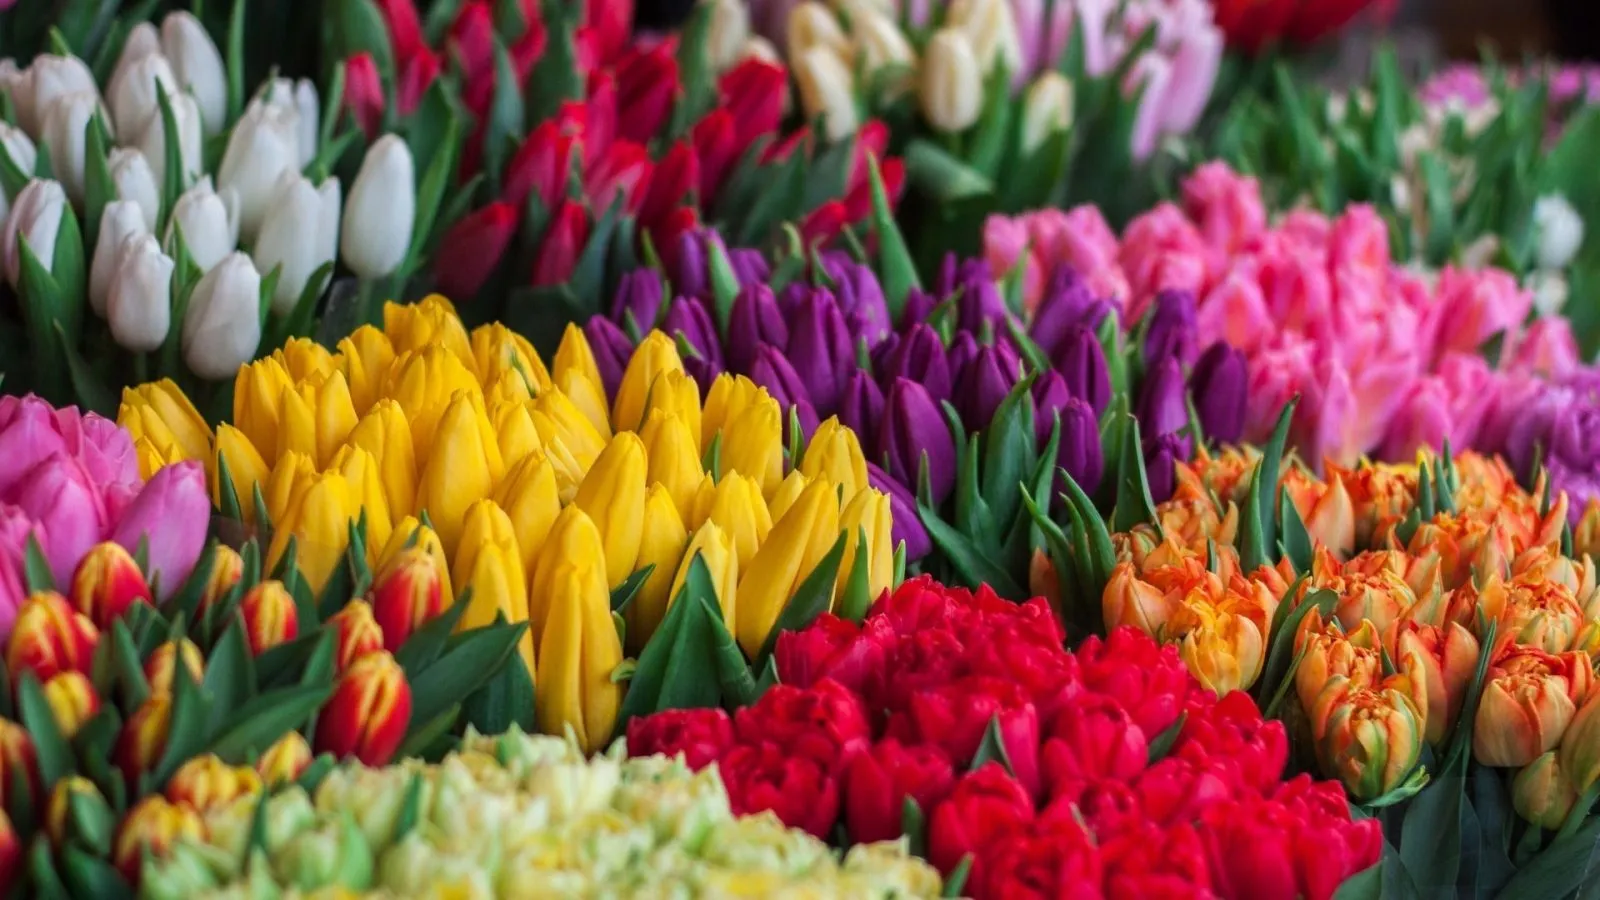

# Use VGG16 to Extract features with VGG16

## Compare optimizers:

SGD(lr=0.0001, momentum=0.9)
Adam (learning_rate = 0.0001)
rmsprop

loss='categorical_crossentropy'

## ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

rescale -> convert the pixels in range [0,255] to range [0,1]

zoom -> [0.5, 1.5]

rotation -> 40

brightness -> (0.1, 0.9)

channel_shift -> 150.0

horizontal/vertical_flip -> True

width_shift_range=0.3, fill_mode='nearest'

## Compare it with Sequential model below

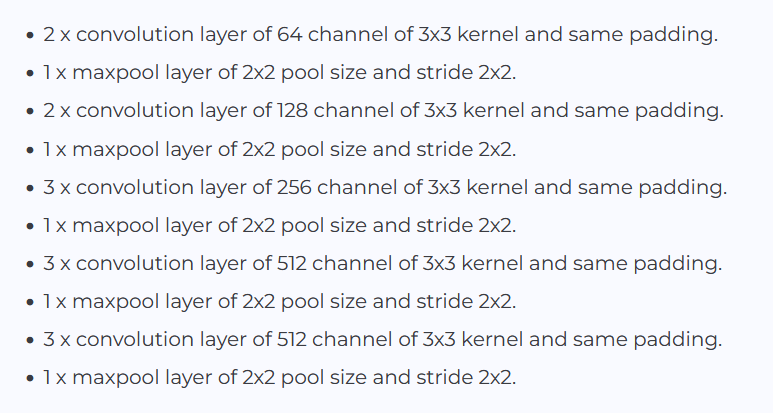

# Fully Connected


GlobalMaxPooling2D

Dropout(0.5)

Dense Softmax layer


## Visualize validation vs training

In [38]:
!pip install --upgrade gdown

In [39]:
!gdown 1eMTTKt5Y_d32kN4HxJi9t4a3X6RqrDlM
!gdown 1QAXuuUiqfKZwNBKA2wnRcY_9DGaOAOzr

Downloading...
From (original): https://drive.google.com/uc?id=1eMTTKt5Y_d32kN4HxJi9t4a3X6RqrDlM
From (redirected): https://drive.usercontent.google.com/download?id=1eMTTKt5Y_d32kN4HxJi9t4a3X6RqrDlM&confirm=t&uuid=8b5791db-0e99-4c57-8894-e109321904a8
To: /content/flowers.zip
100% 150M/150M [00:00<00:00, 212MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QAXuuUiqfKZwNBKA2wnRcY_9DGaOAOzr
To: /content/uc?id=1QAXuuUiqfKZwNBKA2wnRcY_9DGaOAOzr
100% 270k/270k [00:00<00:00, 50.6MB/s]


In [40]:
#Descomprimir el zip en Data
!unzip flowers.zip -d Data

Archive:  flowers.zip
replace Data/sunflower/1008566138_6927679c8a.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/sunflower/1008566138_6927679c8a.jpg  
  inflating: Data/sunflower/1022552002_2b93faf9e7_n.jpg  
  inflating: Data/sunflower/1022552036_67d33d5bd8_n.jpg  
  inflating: Data/sunflower/10386503264_e05387e1f7_m.jpg  
  inflating: Data/sunflower/10386522775_4f8c616999_m.jpg  
  inflating: Data/sunflower/10386525005_fd0b7d6c55_n.jpg  
  inflating: Data/sunflower/10386525695_2c38fea555_n.jpg  
  inflating: Data/sunflower/10386540106_1431e73086_m.jpg  
  inflating: Data/sunflower/10386540696_0a95ee53a8_n.jpg  
  inflating: Data/sunflower/10386702973_e74a34c806_n.jpg  
  inflating: Data/sunflower/1043442695_4556c4c13d_n.jpg  
  inflating: Data/sunflower/1044296388_912143e1d4.jpg  
  inflating: Data/sunflower/10541580714_ff6b171abd_n.jpg  
  inflating: Data/sunflower/1064662314_c5a7891b9f_m.jpg  
  inflating: Data/sunflower/10862313945_e8ed9202d9_m.jpg  
  inflating: 

In [41]:
flower_list = ['sunflower', 'tulip', 'rose']

# Test with the downloaded file

rose_test.jpeg

# Save a model in a pickle file

In [42]:
# Importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K

In [43]:
#Instanciar el modelo pre entrenado de VGG16
altura = 124
longitud = 124
canales = 3
epochs = 10
batch_size = 16
n_classes = 3
tf.random.set_seed(221)
tipo="categorical"

pre_trained_model = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (altura, longitud, canales)
)

In [44]:
#Cargar las imagenes
import os
path_base = os.getcwd()
data_base= path_base+'/Data'
data_base

'/content/Data'

In [45]:
#ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 40,
    zoom_range = [0.5, 1.5],
    fill_mode = "nearest",
    width_shift_range=0.3,
    brightness_range = (0.1, 0.9),
    channel_shift_range = 150.0
    )
train_generator = train_datagen.flow_from_directory(
    data_base,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode=tipo,
    subset='training',
    shuffle=True)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2)

validation_generator = validation_datagen.flow_from_directory(
    data_base,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode=tipo,
    subset='validation',
    shuffle=False)

Found 2501 images belonging to 3 classes.
Found 498 images belonging to 3 classes.


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
SGD=tf.keras.models.Sequential([
      pre_trained_model,
      tf.keras.layers.GlobalMaxPooling2D(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3,activation='softmax')])

Adam=tf.keras.models.Sequential([
      pre_trained_model,
      tf.keras.layers.GlobalMaxPooling2D(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3,activation='softmax')])

RMSprop=tf.keras.models.Sequential([
      pre_trained_model,
      tf.keras.layers.GlobalMaxPooling2D(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3,activation='softmax')])

In [48]:
#Fine-tunning

# Es un proceso en el que ajustas la red pre-entrenada para que sea más específica para la tarea en particular.
# En este caso, se congela una parte de las capas de VGG16 (las primeras 3/4 partes) y se permite que las capas restantes se ajusten durante el entrenamiento.

# Esto se hace por varias razones:

# 1.Transferencia de conocimiento: Las capas iniciales de una CNN como VGG16 aprenden características generales, como bordes y formas básicas, que son útiles en una variedad de tareas.
#   Congelar estas capas permite aprovechar el conocimiento pre-entrenado y acelerar el entrenamiento, ya que no es necesario aprender estas características nuevamente.

# 2.Ajuste a tareas específicas: Al permitir que algunas de las capas se ajusten durante el entrenamiento, la red puede adaptarse a características específicas de la tarea que estás abordando,
#   como reconocimiento de imágenes particulares.

# 3.Evitar el sobreajuste: Congelar algunas capas ayuda a prevenir el sobreajuste, ya que limita la cantidad de parámetros que se ajustan durante el entrenamiento.
#   Esto es especialmente útil cuando tienes un conjunto de datos pequeño.


i=0
for layer in pre_trained_model.layers:
    if i<3*len(pre_trained_model.layers)//5:
        layer.trainable=False
    else:
        layer.trainable=True
    i=i+1

In [49]:
#Optimizadores

SGD.compile(
      optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0001, momentum = 0.9),
      loss='categorical_crossentropy',
      metrics= ["accuracy"])

Adam.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
      loss='categorical_crossentropy',
      metrics= ["accuracy"])

RMSprop.compile(
      optimizer=tf.keras.optimizers.RMSprop(),
      loss='categorical_crossentropy',
      metrics= ["accuracy"])

In [50]:
# Entrenamiento SGD

historySGD=SGD.fit(
      train_generator,
      steps_per_epoch = train_generator.n//batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps =validation_generator.n//batch_size
    )

Epoch 1/10
156/156 [==============================] - 29s 143ms/step - loss: 1.1315 - accuracy: 0.3867 - val_loss: 0.9498 - val_accuracy: 0.5746
Epoch 2/10
156/156 [==============================] - 22s 141ms/step - loss: 1.0073 - accuracy: 0.4909 - val_loss: 0.7318 - val_accuracy: 0.6915
Epoch 3/10
156/156 [==============================] - 21s 132ms/step - loss: 0.8458 - accuracy: 0.6032 - val_loss: 0.5642 - val_accuracy: 0.7641
Epoch 4/10
156/156 [==============================] - 21s 132ms/step - loss: 0.7602 - accuracy: 0.6511 - val_loss: 0.4590 - val_accuracy: 0.8004
Epoch 5/10
156/156 [==============================] - 19s 124ms/step - loss: 0.7307 - accuracy: 0.6736 - val_loss: 0.5409 - val_accuracy: 0.7339
Epoch 6/10
156/156 [==============================] - 21s 133ms/step - loss: 0.6899 - accuracy: 0.6926 - val_loss: 0.4583 - val_accuracy: 0.8065
Epoch 7/10
156/156 [==============================] - 20s 125ms/step - loss: 0.6812 - accuracy: 0.6899 - val_loss: 0.3759 - val_ac

In [51]:
#Entrenamiento Adam

historyAdam=Adam.fit(
      train_generator,
      steps_per_epoch = train_generator.n//batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps =validation_generator.n//batch_size
    )

Epoch 1/10
156/156 [==============================] - 23s 126ms/step - loss: 0.9437 - accuracy: 0.5384 - val_loss: 0.4806 - val_accuracy: 0.7762
Epoch 2/10
156/156 [==============================] - 20s 126ms/step - loss: 0.7841 - accuracy: 0.6298 - val_loss: 0.4069 - val_accuracy: 0.8407
Epoch 3/10
156/156 [==============================] - 21s 132ms/step - loss: 0.6880 - accuracy: 0.6793 - val_loss: 0.3995 - val_accuracy: 0.8306
Epoch 4/10
156/156 [==============================] - 21s 136ms/step - loss: 0.6738 - accuracy: 0.7014 - val_loss: 0.3897 - val_accuracy: 0.8387
Epoch 5/10
156/156 [==============================] - 21s 133ms/step - loss: 0.6231 - accuracy: 0.7179 - val_loss: 0.3235 - val_accuracy: 0.8690
Epoch 6/10
156/156 [==============================] - 20s 125ms/step - loss: 0.6398 - accuracy: 0.7062 - val_loss: 0.4735 - val_accuracy: 0.8185
Epoch 7/10
156/156 [==============================] - 21s 132ms/step - loss: 0.5871 - accuracy: 0.7541 - val_loss: 0.4242 - val_ac

In [52]:
#Entrenamiento RMSprop

historyRMSprop=RMSprop.fit(
      train_generator,
      steps_per_epoch = train_generator.n//batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps =validation_generator.n//batch_size
    )

Epoch 1/10
156/156 [==============================] - 23s 133ms/step - loss: 2.9787 - accuracy: 0.3501 - val_loss: 1.1069 - val_accuracy: 0.2661
Epoch 2/10
156/156 [==============================] - 20s 126ms/step - loss: 1.1340 - accuracy: 0.3501 - val_loss: 1.0965 - val_accuracy: 0.3911
Epoch 3/10
156/156 [==============================] - 21s 135ms/step - loss: 1.0949 - accuracy: 0.3920 - val_loss: 1.0935 - val_accuracy: 0.3911
Epoch 4/10
156/156 [==============================] - 21s 134ms/step - loss: 1.0926 - accuracy: 0.3936 - val_loss: 1.0921 - val_accuracy: 0.3911
Epoch 5/10
156/156 [==============================] - 21s 132ms/step - loss: 1.0912 - accuracy: 0.3944 - val_loss: 1.0914 - val_accuracy: 0.3911
Epoch 6/10
156/156 [==============================] - 20s 125ms/step - loss: 1.0908 - accuracy: 0.3936 - val_loss: 1.0910 - val_accuracy: 0.3911
Epoch 7/10
156/156 [==============================] - 20s 128ms/step - loss: 1.0903 - accuracy: 0.3948 - val_loss: 1.0910 - val_ac

In [53]:
#Sequential model

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(altura, longitud, canales)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    # tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Con las ultimas 2 capas no compilaba el modelo

In [54]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
      loss='categorical_crossentropy',
      metrics= ["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 256)      

In [55]:
history = model.fit(
  train_generator,
  steps_per_epoch = train_generator.n//batch_size,
  epochs = epochs,
  validation_data = validation_generator,
  validation_steps =validation_generator.n//batch_size
)

Epoch 1/10
156/156 [==============================] - 22s 119ms/step - loss: 0.9945 - accuracy: 0.4592 - val_loss: 1.2101 - val_accuracy: 0.4960
Epoch 2/10
156/156 [==============================] - 20s 130ms/step - loss: 0.8888 - accuracy: 0.5581 - val_loss: 1.0716 - val_accuracy: 0.5726
Epoch 3/10
156/156 [==============================] - 18s 118ms/step - loss: 0.8633 - accuracy: 0.5799 - val_loss: 0.9590 - val_accuracy: 0.5968
Epoch 4/10
156/156 [==============================] - 19s 122ms/step - loss: 0.8205 - accuracy: 0.5976 - val_loss: 0.8795 - val_accuracy: 0.6452
Epoch 5/10
156/156 [==============================] - 19s 121ms/step - loss: 0.8249 - accuracy: 0.6064 - val_loss: 0.9233 - val_accuracy: 0.6472
Epoch 6/10
156/156 [==============================] - 19s 120ms/step - loss: 0.7925 - accuracy: 0.6197 - val_loss: 0.9111 - val_accuracy: 0.6653
Epoch 7/10
156/156 [==============================] - 19s 119ms/step - loss: 0.7721 - accuracy: 0.6326 - val_loss: 0.8203 - val_ac

In [77]:
# Test SGD
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Cargar la imagen
rosa = Image.open('flower.jpg')

# Redimensionar la imagen
image = rosa.resize((altura, longitud))

# Convertir la imagen a un array NumPy
image = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen
image = preprocess_input(image)

# Realizar la predicción
predictions = SGD.predict(np.expand_dims(image, axis=0))

class_index = np.argmax(predictions)
class_labels = ['sunflower', 'tulip', 'rose']
predicted_label = class_labels[class_index]
print("Clase predicha:", predicted_label)

1/1 [==============================] - 0s 28ms/step
Clase predicha: rose


In [78]:
# Test Adam
from PIL import Image

# Cargar la imagen
rosa = Image.open('flower.jpg')

# Redimensionar la imagen
image = rosa.resize((altura, longitud))

# Convertir la imagen a un array NumPy
image = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen
image = preprocess_input(image)

# Realizar la predicción
predictions = Adam.predict(np.expand_dims(image, axis=0))

class_index = np.argmax(predictions)
class_labels = ['sunflower', 'tulip', 'rose']
predicted_label = class_labels[class_index]
print("Clase predicha:", predicted_label)

1/1 [==============================] - 0s 19ms/step
Clase predicha: rose


In [79]:
# Test RMSprop
from PIL import Image

# Cargar la imagen
rosa = Image.open('flower.jpg')

# Redimensionar la imagen
image = rosa.resize((altura, longitud))

# Convertir la imagen a un array NumPy
image = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen
image = preprocess_input(image)

# Realizar la predicción
predictions = RMSprop.predict(np.expand_dims(image, axis=0))

class_index = np.argmax(predictions)
class_labels = ['sunflower', 'tulip', 'rose']
predicted_label = class_labels[class_index]
print("Clase predicha:", predicted_label)

1/1 [==============================] - 0s 33ms/step
Clase predicha: rose


In [80]:
# Test our model
from PIL import Image

# Cargar la imagen
rosa = Image.open('flower.jpg')

# Redimensionar la imagen
image = rosa.resize((altura, longitud))

# Convertir la imagen a un array NumPy
image = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen
image = preprocess_input(image)

# Realizar la predicción
predictions = model.predict(np.expand_dims(image, axis=0))

class_index = np.argmax(predictions)
class_labels = ['sunflower', 'tulip', 'rose']
predicted_label = class_labels[class_index]
print("Clase predicha:", predicted_label)

1/1 [==============================] - 0s 55ms/step
Clase predicha: tulip


In [83]:
#  Modelo SGD

# Guardar el modelo completo (arquitectura, pesos, optimizador, etc.) en un solo archivo
SGD.save('SGDModel.h5')

# Guardar solo la arquitectura del modelo en formato JSON
SGDmodel_json = SGD.to_json()
with open("SGDModel.json", "w") as json_file:
    json_file.write(SGDmodel_json)

# Opcionalmente, puedes guardar solo los pesos del modelo en formato HDF5
SGD.save_weights("SGDWeights.h5")



In [84]:
#  Modelo Adam

# Guardar el modelo completo (arquitectura, pesos, optimizador, etc.) en un solo archivo
Adam.save('AdamModel.h5')

# Guardar solo la arquitectura del modelo en formato JSON
AdamModel_json = Adam.to_json()
with open("AdamModel.json", "w") as json_file:
    json_file.write(AdamModel_json)

# Opcionalmente, puedes guardar solo los pesos del modelo en formato HDF5
SGD.save_weights("AdamWeights.h5")


In [85]:
#  Modelo RMSprop

# Guardar el modelo completo (arquitectura, pesos, optimizador, etc.) en un solo archivo
RMSprop.save('RMSpropModel.h5')

# Guardar solo la arquitectura del modelo en formato JSON
RMSpropmodel_json = RMSprop.to_json()
with open("RMSprop.json", "w") as json_file:
    json_file.write(RMSpropmodel_json)

# Opcionalmente, puedes guardar solo los pesos del modelo en formato HDF5
SGD.save_weights("RMSpropWeights.h5")


In [86]:
#  Modelo propio

# Guardar el modelo completo (arquitectura, pesos, optimizador, etc.) en un solo archivo
model.save('Model.h5')

# Guardar solo la arquitectura del modelo en formato JSON
model_json = SGD.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Opcionalmente, puedes guardar solo los pesos del modelo en formato HDF5
SGD.save_weights("modelWeights.h5")


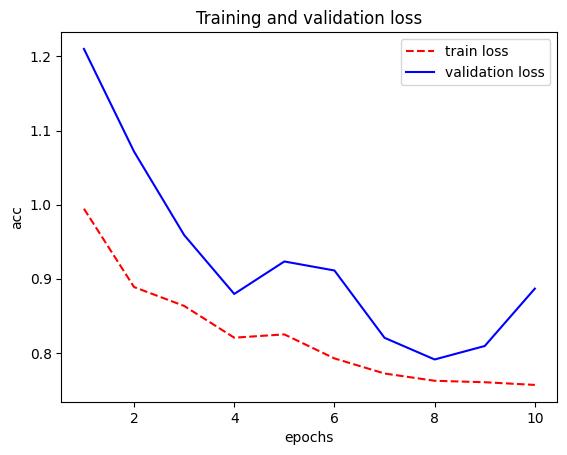

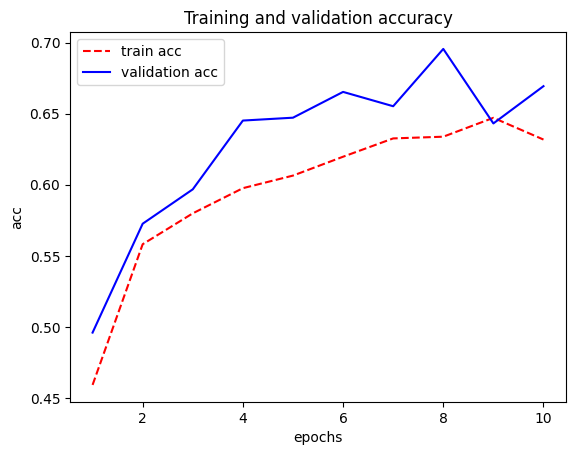

In [87]:
history_dict = history.history

acc      = history.history[ 'accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

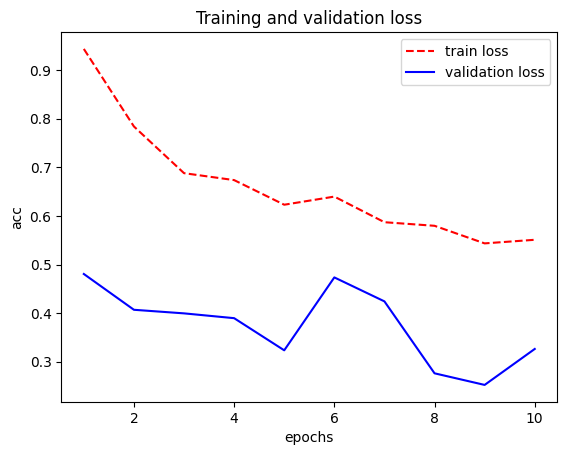

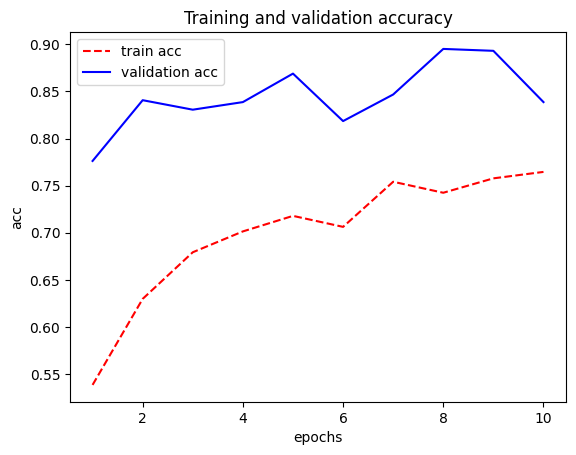

In [71]:
# Graficas Adam
history_dict_Adam = historyAdam.history

acc      = historyAdam.history[ 'accuracy']
val_acc  = historyAdam.history['val_accuracy']
loss     = historyAdam.history[    'loss' ]
val_loss = historyAdam.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

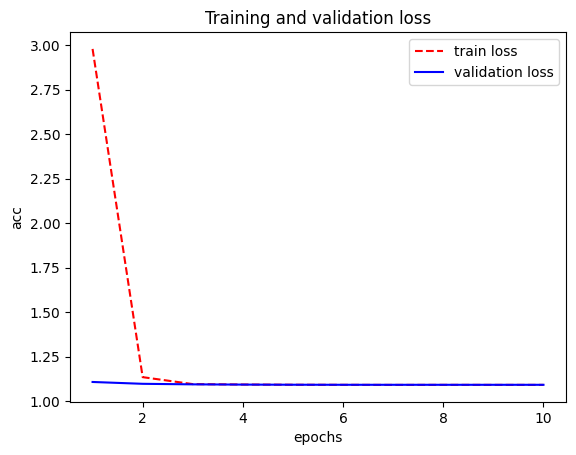

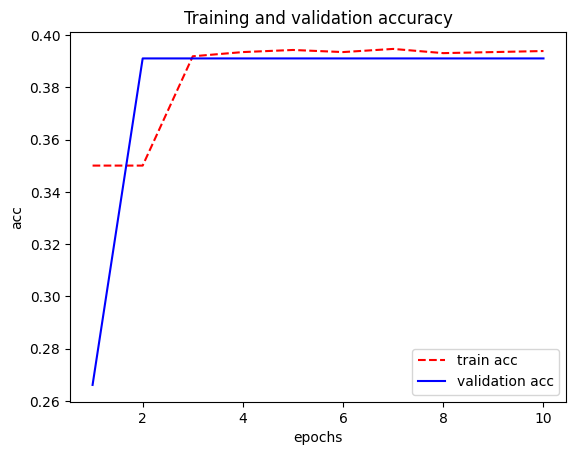

In [72]:
# Graficas RMSprop
history_dict_RMSprop = historyRMSprop.history

acc      = historyRMSprop.history[ 'accuracy']
val_acc  = historyRMSprop.history['val_accuracy']
loss     = historyRMSprop.history[    'loss' ]
val_loss = historyRMSprop.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

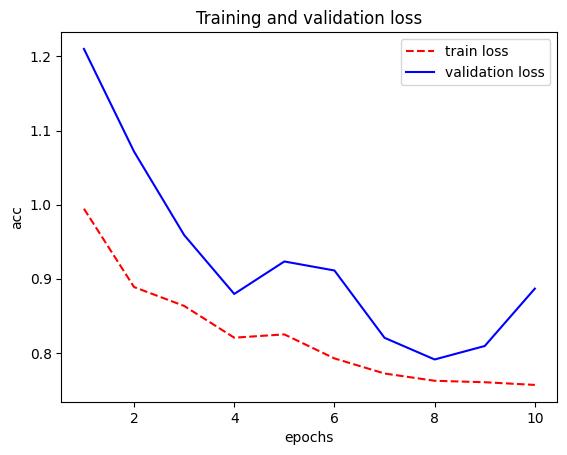

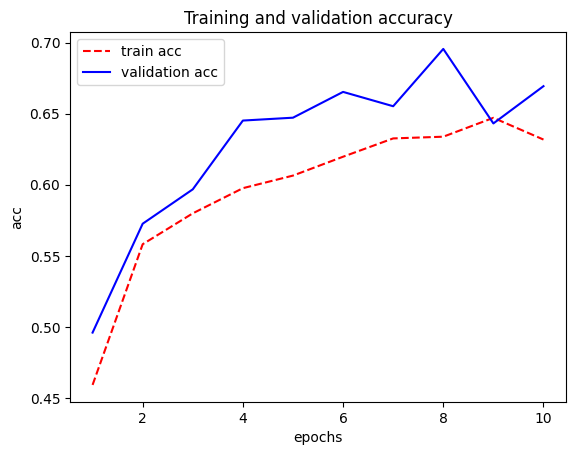

In [73]:
# Graficas modelo propio
history_dict = history.history

acc      = history.history[ 'accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()